# Introduction

# Step 1)  Import libraries

In the following cells we will import the necessary libraries that are needed for creating our neural network.<br />
<b>1) Numpy</b><br />
<b>2) keras</b><br />
<b>3) Sequential model type:</b> This provides  linear stack of neural network layers and it is good for mlp and CNN nets.<br />
<b>4) "core" layers (Dense, Dropout, Activation, Flatten): </b> These are layers used in most of neural networks. <br />
<b>5) utilities: </b> It is useful for transforming data.<br />
<b>6) pyplot from matplotlib: </b> It is used for plotting figures and images.<br />
<br /><br />
<b>7) </b> At the end we can set a seed for random generator. This allows us to reproduce the results from our script

In [17]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5272566974958499799
]


In [19]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(2017)

# Step 2) Load and prepare data

In this step we load and prepare data set in order to feed the network.

### Load data (MNIST data set)

<b>MNIST</b> is a great dataset for getting started with deep learning and computer vision. It's a big enough challenge in neural networks and most of the NN models tested themselves on this data set.

In [20]:
from keras.datasets import mnist

#load mnist in train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The MNIST dataset is a large database of handwritten digits. It contains 60,000 training images and 10,000 testing images. Each data sample is a $28 \times 28$ gray scale image.

In [22]:
# print train and test data shape
print('train data:')
print(X_train.shape)
print(y_train.shape)
print('min: ', np.min(X_train), '\tmax: ', np.max(X_train))
print('\ntest data:')
print(X_test.shape)
print(y_test.shape)
print('min: ', np.min(X_test), '\tmax: ', np.max(X_test))

train data:
(60000, 28, 28)
(60000,)
min:  0 	max:  255

test data:
(10000, 28, 28)
(10000,)
min:  0 	max:  255


### Plot sample image

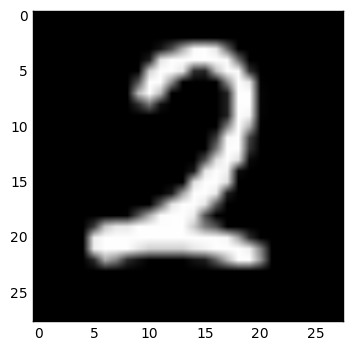

In [27]:
random_idx = np.random.randint(60000)
plt.imshow(X_train[random_idx,:,:], cmap="Greys_r")
plt.show()

### Prepare data

The data mast reshape to a proper form

In [28]:
# reshape data
print(X_train.shape[1])
trainX = np.reshape(X_train, [X_train.shape[0], X_train.shape[1]*X_train.shape[2]])
testX = np.reshape(X_test, [X_test.shape[0], X_test.shape[1]*X_test.shape[2]])

print(trainX.shape)
print(testX.shape)

28
(60000, 784)
(10000, 784)


The final preprocessing step for the input data is to convert our data type to <b>float32</b> and <b>normalize</b> our data values to the range [0, 1].

In [29]:
trainX_normal = (trainX/255.)
testX_normal = (testX/255.)

trainX_normal = trainX_normal.astype('float32')
testX_normal = testX_normal.astype('float32')

print('train)\tmin: ', np.min(trainX_normal), '\tmax: ', np.max(trainX_normal))
print('test)\tmin: ', np.min(testX_normal), '\tmax: ', np.max(testX_normal))

train)	min:  0.0 	max:  1.0
test)	min:  0.0 	max:  1.0


### Preprocess class labels

Let's take a look at first 10 data samples class labels

In [30]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In order to train a MLP network, they should convert to one-hot encoding form in order to demonstrate the probability of classes

In [31]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('train labels:\t',Y_train.shape)
print('test labels:\t',Y_test.shape)

train labels:	 (60000, 10)
test labels:	 (10000, 10)


Let's take a look at first 10 data samples class labels after conversion.

In [32]:
print(Y_train[0:10, :])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


# Step 3) Define model architecture

A model object in Keras includes all layers of implemented network and it defines the architecture of it. Instead of defining a network model by the weight matrices and biases we can define it layer by layer in Keras which simplify the network definition and allows us to implement a network very quickly. 

### In Keras we can define models in two forms:

#### Form 1)

In [33]:
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True,  input_shape=(784,)))
model.add(Dense(128, activation='relu', use_bias=True))
model.add(Dense(10, activation='softmax', use_bias=True))

#### Form 2)

In [34]:
from keras.models import Model

X_inp = Input(shape=(784,))
h1 = Dense(512, activation='relu', use_bias=True)(X_inp)
h2 = Dense(128, activation='relu', use_bias=True)(h1)
h3 = Dense(10, activation='softmax', use_bias=True)(h2)

model = Model(inputs=X_inp, outputs=h3)

# Step 4) Compile model

In this step we define the <b>loss function</b> and the <b>optimizer</b>.

In [35]:
mysgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error',
              optimizer=mysgd,
              metrics=['accuracy'])

We can check the summary of the model to see the summary of network layers, number of total paramiters, number of trainable and non-trainable paramiters.

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


# Step 5) Fit model on training data

In [38]:
model.fit(trainX_normal, Y_train, 
          batch_size=128, 
          epochs=50, 
          verbose=1)

Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.0164 - acc: 0.9010     
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.0163 - acc: 0.9017     
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.0161 - acc: 0.9025     
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.0160 - acc: 0.9033     
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.0159 - acc: 0.9036     
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.0157 - acc: 0.9045     
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.0156 - acc: 0.9051     
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.0155 - acc: 0.9055     
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.0154 - acc: 0.9060     
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.0153 - acc: 0.9067     
Epoch 11/50
60000/60000 [========================

# Step 6) Prediction and check the test error

The <b>model.predict()</b> function performs just the forward pass of the network.

In [39]:
prd = model.predict(testX_normal)

The output of the network for each sample shows the membership degree of each class for that sample. Each sample belongs to the class with highest membership digree.

In [40]:
prd_y = np.argmax(prd, axis=1)

Take a look at the first 10 predicted labels by the network and compare it with true labels.

In [41]:
print(prd_y[0:10])
print(y_test[0:10])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


### Compute the test accuracy

In [51]:
nb_correct_labels = np.sum(prd_y == y_test)
print('Test accuracy is: ', nb_correct_labels/len(y_test))

Test accuracy is:  0.9076


# Additional steps

#### save the model

In [21]:
model.save('./mlp.h5') # creates a HDF5 file 'mlp1.h5'

#### Load a traind model

In [22]:
loaded_model = keras.models.load_model('./mlp.h5')

#### Get the weights of a model

In [23]:
weights = model.get_weights()

print(type(weights))
print(len(weights))

print('layer 1 params dimensions:\n\t', weights[0].shape,'\n\t', weights[1].shape)

<class 'list'>
6
layer 1 params dimensions:
	 (784, 512) 
	 (512,)


## References

1) https://keras.io <br />
2) https://github.com/fchollet/keras <br />
3) https://elitedatascience.com/keras-tutorial-deep-learning-in-python <br />
4) https://blog.keras.io